In [331]:
#import packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

from gnat import misc_utils
from gnat import error_calculator
from gnat import rarefaction
from gnat import gtf_tools
from gnat import kegg_tools

In [21]:
# load data and analysis metadata
data = pd.read_csv('data/counts_tables/dpl_tpm_counts_kallisto.csv')
data.rename(columns={data.columns[0]: "sample-id" }, inplace = True)
metadata = pd.read_csv('data/mtstp_analysis_metadata.tsv', sep="\t")

In [22]:
data

,sample-id,lcl|KZ248545.1_cds_OWR45966.1_1,lcl|KZ248545.1_cds_OWR42929.1_2,lcl|KZ248545.1_cds_OWR42930.1_3,lcl|KZ248545.1_cds_OWR42931.1_4,lcl|KZ248545.1_cds_OWR42932.1_5,lcl|KZ248545.1_cds_OWR42933.1_6,lcl|KZ248545.1_cds_OWR42934.1_7,lcl|KZ248545.1_cds_OWR42935.1_8,lcl|KZ248545.1_cds_OWR42936.1_9,...,lcl|KZ253939.1_cds_OWR46811.1_15223,lcl|KZ253939.1_cds_OWR46812.1_15224,lcl|KZ253939.1_cds_OWR46813.1_15225,lcl|KZ253939.1_cds_OWR46814.1_15226,lcl|KZ253939.1_cds_OWR46815.1_15227,lcl|KZ253939.1_cds_OWR48030.1_15228,lcl|KZ253939.1_cds_OWR48031.1_15229,lcl|KZ253939.1_cds_OWR48032.1_15230,lcl|KZ253939.1_cds_OWR48033.1_15231,lcl|KZ253939.1_cds_OWR55584.1_15232
0,mtstpEii125,0.004381,0.039196,85.4555,0.508671,2.38295,0.410526,0.053315,0.00000,0.000000,...,7.48825,9.33157,190.60500,2.266760,1.170880,0.198596,13.2175,96.8043,1.41668,0.600303
1,mtstp3ci13,121.394000,144.737000,428.6490,42.716800,61.33330,0.000000,0.021915,5.74457,46.056200,...,13.32510,14.13740,51.40800,3.320580,1.175760,0.000000,38.6036,133.7850,3.55901,9.621840
2,mtstpEci42,0.646201,1.008030,166.6050,1.263900,5.06978,1.455550,0.021649,0.00000,0.274288,...,5.60986,13.29110,304.54700,3.403330,2.070350,0.108271,26.7120,102.4330,0.00000,1.623430
3,mtstp5iu98,40.307900,56.571700,1108.7200,161.260000,3.71412,1.121030,0.000000,4.42744,80.614100,...,7.63375,8.38529,5.12428,1.773930,0.788076,0.011144,21.5114,25.0025,0.00000,0.857986
4,mtstp3cu2,117.197000,158.977000,473.1770,50.214300,51.89600,1.055150,0.024980,3.66607,47.019600,...,15.86870,12.53940,48.76550,3.593860,1.226600,0.291278,29.5781,105.5880,0.00000,8.049470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,mtstpAii153,46.375600,61.749900,810.2900,2.772070,25.28060,2.462810,0.188626,2.10779,1.622320,...,17.98660,6.27393,43.63360,1.166930,1.170470,0.039122,14.4635,90.2910,2.57192,7.974530
92,mtstpAci77,1.684830,5.399350,755.1430,4.621490,29.59380,5.551320,0.377091,1.28787,2.265960,...,22.12470,3.24203,22.89580,0.917825,0.816288,0.027339,14.4812,77.3260,0.00000,0.525099
93,mtstpLcu52,0.043105,0.010688,565.6320,11.630800,0.67764,0.408865,0.057959,2.67938,0.000000,...,14.53790,7.07602,154.93600,1.889370,1.440390,0.008031,56.5950,149.0960,0.00000,0.628331
94,mtstp5ii107,53.877000,65.076400,1386.1200,98.326700,7.20435,0.000000,0.000000,1.91613,114.335000,...,8.97799,7.61914,13.53200,1.463300,0.647857,0.000000,15.6554,50.0417,0.00000,0.518187


In [4]:
metadata

,sample-id,plant,infection-status,developmental-stage
0,mtstp3ci10,curassavica,infected,third-instar
1,mtstp3ci11,curassavica,infected,third-instar
2,mtstp3ci12,curassavica,infected,third-instar
3,mtstp3ci13,curassavica,infected,third-instar
4,mtstp3ci9,curassavica,infected,third-instar
...,...,...,...,...
91,mtstpLiu129,incarnata,uninfected,late-pupa
92,mtstpLiu130,incarnata,uninfected,late-pupa
93,mtstpLiu131,incarnata,uninfected,late-pupa
94,mtstpLiu133,incarnata,uninfected,late-pupa


In [35]:
#since this analysis will onyl deal with uninfected individuals, I'll filter out all infected samples
uninfected_samples = list(metadata.loc[metadata['infection-status'] != 'infected']['sample-id'])
uninfected_data = data[data['sample-id'].isin(uninfected_samples)]
uninfected_data.set_index("sample-id", inplace = True)
uninfected_data

,lcl|KZ248545.1_cds_OWR45966.1_1,lcl|KZ248545.1_cds_OWR42929.1_2,lcl|KZ248545.1_cds_OWR42930.1_3,lcl|KZ248545.1_cds_OWR42931.1_4,lcl|KZ248545.1_cds_OWR42932.1_5,lcl|KZ248545.1_cds_OWR42933.1_6,lcl|KZ248545.1_cds_OWR42934.1_7,lcl|KZ248545.1_cds_OWR42935.1_8,lcl|KZ248545.1_cds_OWR42936.1_9,lcl|KZ248545.1_cds_OWR51149.1_10,...,lcl|KZ253939.1_cds_OWR46811.1_15223,lcl|KZ253939.1_cds_OWR46812.1_15224,lcl|KZ253939.1_cds_OWR46813.1_15225,lcl|KZ253939.1_cds_OWR46814.1_15226,lcl|KZ253939.1_cds_OWR46815.1_15227,lcl|KZ253939.1_cds_OWR48030.1_15228,lcl|KZ253939.1_cds_OWR48031.1_15229,lcl|KZ253939.1_cds_OWR48032.1_15230,lcl|KZ253939.1_cds_OWR48033.1_15231,lcl|KZ253939.1_cds_OWR55584.1_15232
sample-id,,,,,,,,,,,,,,,,,,,,,
mtstp5iu98,40.307900,56.571700,1108.7200,161.260000,3.714120,1.121030,0.000000,4.427440,80.614100,0.571328,...,7.63375,8.38529,5.12428,1.773930,0.788076,0.011144,21.51140,25.0025,0.000000,0.857986
mtstp3cu2,117.197000,158.977000,473.1770,50.214300,51.896000,1.055150,0.024980,3.666070,47.019600,1.520990,...,15.86870,12.53940,48.76550,3.593860,1.226600,0.291278,29.57810,105.5880,0.000000,8.049470
mtstp5cu17,53.580300,72.488100,847.3960,143.629000,6.129130,0.000000,0.000000,1.789000,68.445200,1.173910,...,8.82507,8.81382,4.24864,0.897578,0.765841,0.000000,31.69200,76.7036,0.000000,2.985790
mtstpLiu130,0.036026,0.000000,750.5200,3.536750,3.418260,0.629009,0.000000,0.529960,1.137820,11.142000,...,13.34150,5.86868,133.43200,1.111620,1.160870,0.006044,55.27390,130.0230,0.000000,0.239330
mtstpLiu133,0.025680,0.091779,439.9790,8.929790,2.229130,2.650270,1.432950,2.357130,0.270234,8.235870,...,11.09360,5.79064,146.81100,1.351020,1.207460,0.025850,38.63890,70.4854,0.000000,0.000000
mtstpEcu38,0.000000,0.011409,205.2790,0.678483,4.695950,0.953417,0.020652,0.044239,0.000000,6.483220,...,9.24495,12.27980,355.74000,3.540060,1.861930,0.008570,44.80340,223.3030,0.717028,2.056850
mtstpAiu148,20.759100,32.852500,879.6510,6.046150,6.695500,0.369350,0.351016,5.922370,4.350970,66.263500,...,34.54550,4.44715,39.52500,1.589870,1.345300,0.131708,23.62360,65.2631,0.000000,0.374311
mtstp5iu100,32.551700,40.219300,1100.9300,173.425000,5.561670,1.156950,0.000000,2.484970,86.955500,1.052060,...,9.33069,8.27777,9.11512,1.463130,0.947899,0.000000,26.54300,54.4123,0.000000,0.933983
mtstpLiu131,1.578640,1.649300,1298.7200,9.646060,0.334944,0.417812,0.834579,7.058230,2.366580,19.060900,...,21.34560,2.39756,138.19300,0.970659,0.904959,0.000000,16.73580,79.4092,0.000000,0.106698


### Analysis: Examine how well each developmental stage corresponds the subsequent developmental stage in terms of gene expression (dis)similarity.

I figure that differences in global gene expression can be quantified by calculating the error in expression between for each gene between two samples. If the samples have similar gene expression patterns, this error should be lower than samples with more different global gene expression patterns. In the context of this study, lower root mean squared error (RMSE) values indicate the global gene expression is more similar between infected and uninfected individuals, and higher RMSE values indicate the global gene expression is less similar between infected and uninfected individuals.

In [104]:
#a function to get the relevant rmse comparisons
def get_rmse_data_by_transitions(data, metadata):
    
    #get possible comparisons list
    comparisons = misc_utils.get_pairwise_comparisons(data)
    
    #filter comparisons to only include relevant comparisons
    relevant_comparisons = []
    for comparison in comparisons:
        stage1 = comparison[0][5]
        stage2 = comparison[1][5]
        
        if stage1 == '3' and stage2 == '5' or stage1 == '5' and stage2 == '3':
            relevant_comparisons.append(comparison)
        elif stage1 == '5' and stage2 == 'E' or stage2 == 'E' and stage2 == '5':
            relevant_comparisons.append(comparison)
        elif stage1 == 'E' and stage2 == 'L' or stage1 == 'L' and stage2 == 'E':
            relevant_comparisons.append(comparison)
        elif stage1 == 'L' and stage2 == 'A' or stage1 == 'A' and stage2 == 'L':
            relevant_comparisons.append(comparison)
            
    rmse_results = error_calculator.pairwise_rmse(data, relevant_comparisons)
    
    return rmse_results

#and a function to get this info parsed to the form I want
def parse_rmse_by_transition_data(rmse_data):
    #redefine dataframe to perserve origional dataframe
    rmse_df = rmse_data
    
    #add plant and comparison metadata
    transition = []
    plant = []
    
    comparison1_values = list(rmse_data["comparison1"])
    comparison2_values = list(rmse_data["comparison2"])
    
    for i in range(len(comparison1_values)):
        sample1_id = comparison1_values[i]
        sample2_id = comparison2_values[i]
        
        if sample1_id[6] == sample2_id[6]:
            #define comparisons
            if sample1_id[5] == '3' and sample2_id[5] == '5' or sample1_id[5] == '5' and sample2_id[5] == '3':
                transition.append('3rd-instar : 5th-instar')
                if sample1_id[6] == 'c':
                    plant.append('A. curassavica')
                elif sample1_id[6] == 'i':
                    plant.append('A. incarnata')
            elif sample1_id[5] == '5' and sample2_id[5] == 'E' or sample1_id[5] == 'E' and sample2_id[5] == '5':
                transition.append('5th-instar : Early-pupa')
                if sample1_id[6] == 'c':
                    plant.append('A. curassavica')
                elif sample1_id[6] == 'i':
                    plant.append('A. incarnata')
            elif sample1_id[5] == 'E' and sample2_id[5] == 'L' or sample1_id[5] == 'L' and sample2_id[5] == 'E':
                transition.append('Early-pupa : Late-pupa')
                if sample1_id[6] == 'c':
                    plant.append('A. curassavica')
                elif sample1_id[6] == 'i':
                    plant.append('A. incarnata')
            elif sample1_id[5] == 'L' and sample2_id[5] == 'A' or sample1_id[5] == 'A' and sample2_id[5] == 'L':
                transition.append('Late-pupa : Adult')
                if sample1_id[6] == 'c':
                    plant.append('A. curassavica')
                elif sample1_id[6] == 'i':
                    plant.append('A. incarnata')
                    
        else:
            transition.append('NA')
            plant.append('NA')

    #add comparisons to dataframe
    rmse_df['transition'] = transition
    rmse_df['plant'] = plant
    
    #remove na values
    rmse_df = rmse_df.loc[rmse_df['transition'] != 'NA']
    
    #sort data by transition order
    transitions = ['3rd-instar : 5th-instar', '5th-instar : Early-pupa', 'Early-pupa : Late-pupa', 'Late-pupa : Adult']
    rmse_df['transition'] = pd.Categorical(rmse_df['transition'], categories = transitions)
    rmse_df = rmse_df.sort_values(by='transition')
    
    return rmse_df

In [85]:
#get rmse data
rmse_by_developmental_transition = get_rmse_data_by_transitions(uninfected_data, metadata)

In [105]:
#parse rmse data for relevant comparisons
rmse_data_by_transition_parsed = parse_rmse_by_transition_data(rmse_by_developmental_transition)
rmse_data_by_transition_parsed

/tmp/ipykernel_215231/3066486896.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse_df['transition'] = pd.Categorical(rmse_df['transition'], categories = transitions)


,comparison1,comparison2,rmse,transition,plant
0,mtstp3iu84,mtstp5iu101,797.301130,3rd-instar : 5th-instar,A. incarnata
0,mtstp3iu83,mtstp5iu97,676.391968,3rd-instar : 5th-instar,A. incarnata
0,mtstp3iu85,mtstp5iu101,816.741645,3rd-instar : 5th-instar,A. incarnata
0,mtstp3iu85,mtstp5iu99,454.815130,3rd-instar : 5th-instar,A. incarnata
0,mtstp3iu85,mtstp5iu97,691.092726,3rd-instar : 5th-instar,A. incarnata
...,...,...,...,...,...
0,mtstpAcu66,mtstpLcu52,1422.740486,Late-pupa : Adult,A. curassavica
0,mtstpAcu67,mtstpLcu56,1883.868235,Late-pupa : Adult,A. curassavica
0,mtstpAcu67,mtstpLcu50,1765.604343,Late-pupa : Adult,A. curassavica
0,mtstpAiu148,mtstpLiu135,976.554070,Late-pupa : Adult,A. incarnata


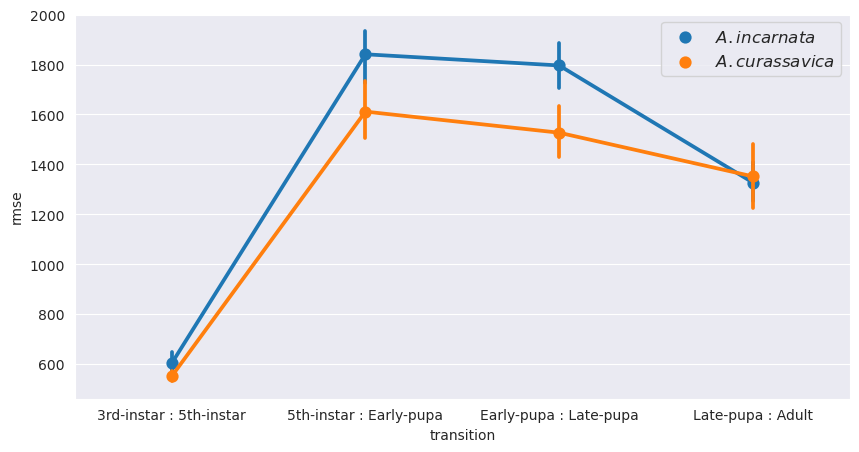

In [316]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax = sns.pointplot(data=rmse_data_by_transition_parsed, y="rmse", x="transition", hue="plant")

ax_legend=ax.legend(prop=fm.FontProperties(size=12))
ax_legend.get_texts()[1].set_text('$A. curassavica$')
ax_legend.get_texts()[0].set_text('$A. incarnata$')

### Interpretation

Initially, this is more or less what I would expect. It seems that the difference in gene expression between 3rd and 5th instars is low (they are more similar). Then at the transition from 5th instar to pupae the differences peak. This makes sense. However, there is almost as much error between early pupae and late pupae, which is interesting. It also seems that which plant the monarch was reared on has an impact on what goes on during the transition from early pupa to late pupa. However, it seems that the transition from pupa to adult results in equally variable gene expression regardless of plant. 

### Analysis: Examine the differences (or lack thereof) between <i>A. curassavica</i> and <i>A. incarnata</i> reared monarchs throughout development.

Overall, the previous analysis suggests that plant diet has the greatest impact during the pupation stage (early to late), resulting in greater transcriptional similarity when reared on <i>A. curassavica</i> and less similarity when reared on <i>A. incarnata</i>. Now I think it could be interesting to see if and where the plant diet results in the greatest transcriptional (dis)similarity. Based on the previous analysis, it seems like this would occur at the early pupae stage because the error between 5th instar and early pupa isn't very different between plants, and the error between late pupa and adults isn't very different between plants.

In [183]:
#a function to get the relevant rmse comparisons
def get_rmse_data_by_plant(data, metadata):
    
    #get possible comparisons list
    comparisons = misc_utils.get_pairwise_comparisons(data)
    
    #filter comparisons to only include relevant comparisons
    relevant_comparisons = []
    for comparison in comparisons:
        
        stage1 = comparison[0][5]
        stage2 = comparison[1][5]
        
        if stage1 == stage2:
            relevant_comparisons.append(comparison)
    
    rmse_results = error_calculator.pairwise_rmse(data, relevant_comparisons)
    
    return rmse_results

def parse_rmse_by_plant_data(rmse_data):
    #redefine dataframe to perserve origional dataframe
    rmse_df = rmse_data
    
    #define lists for metadata
    developmental_stage = []
    
    comparison1_values = list(rmse_df["comparison1"])
    comparison2_values = list(rmse_df["comparison2"])
    
    for i in range(len(comparison1_values)):
        sample1_id = comparison1_values[i]
        sample2_id = comparison2_values[i]
        
        plant1_type = sample1_id[6]
        plant2_type = sample2_id[6]
        
        stage = sample1_id[5]
        
        if plant1_type != plant2_type:
            if stage == '3':
                developmental_stage.append('3rd-instar')
            elif stage == '5':
                developmental_stage.append('5th-instar')
            elif stage == 'E':
                developmental_stage.append('Early-pupa')
            elif stage == 'L':
                developmental_stage.append('Late-pupa')
            elif stage == 'A':
                developmental_stage.append('Adult')
        else:
            developmental_stage.append('NA')
    
    rmse_df['developmental-stage'] = developmental_stage
    
    #remove na values
    rmse_df = rmse_df.loc[rmse_df['developmental-stage'] != 'NA']
    
    #sort data by transition order
    dev_stages = ['3rd-instar', '5th-instar', 'Early-pupa', 'Late-pupa', 'Adult']
    rmse_df['developmental-stage'] = pd.Categorical(rmse_df['developmental-stage'], categories = dev_stages)
    rmse_df = rmse_df.sort_values(by='developmental-stage')
    
    return rmse_df

In [128]:
#get rmse data
rmse_by_plant = get_rmse_data_by_plant(uninfected_data, metadata)

In [184]:
#parse data to get in right format
rmse_by_plant_parsed = parse_rmse_by_plant_data(rmse_by_plant)

/tmp/ipykernel_215231/4267233356.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse_df['developmental-stage'] = pd.Categorical(rmse_df['developmental-stage'], categories = dev_stages)


Text(0.5, 1.0, '$A. incarnta : A. curassavica$')

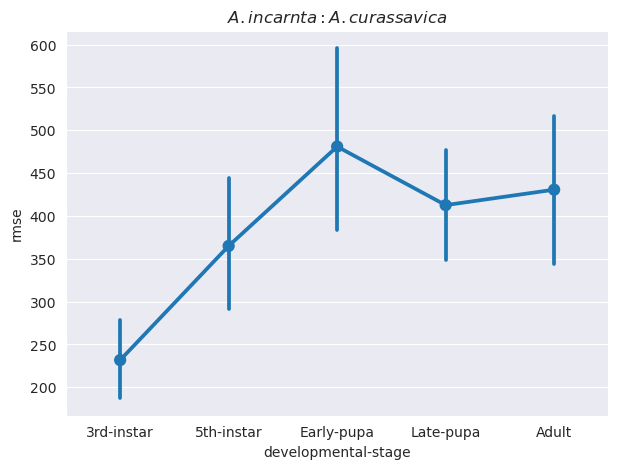

In [191]:
#make plot
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.pointplot(data=rmse_by_plant_parsed, x='developmental-stage', y='rmse', ax=ax)
ax.set_title('$A. incarnta : A. curassavica$')

### Interpretation

As expected, the greatest amount of error (dissimilarity) between <i>A. incarnata</i>- and <i>A. curassavica</i>- reared monarchs occurs at the early pupa stage. Interestingly, the error between <i>A. incarnata</i>- and <i>A. curassavica</i>- reared monarchs seems to compound (linearly increases) until the early pupa stage, where it then declines slightly and levels off at the late pupa and adult. It's too early to make interpretations about the biological relevance, but it seems like going through the transition from larvae is pretty important, so there are probably some genes that are ramped up or down are needed for this transition. Also, at the adult stage, there is still some error in expression. It'll be interesting to see if this error is a lot or a little (it's hard to tell), and if that error has any broader implications for the adult's physiology.

### Analysis

Now that I've quantified the error across and between developmental stages, it's time to take a more standard approach (that I probably should have started with). I'll start by calculating a distance matrix (Euclidian and/or Manhattan) for the samples and identifying how the differences in gene expression between <i>A. curassavica</i>- and <i>A. incarnata</i>- reared monarchs varies across life stages. This can be formally tested with a (PER)MANOVA. Also, I think a redundancy analysis would be good to see how much variation in gene expression can be explained by plant difference and genetic background across ontogeny. I think using Euclidian distances are fine for this. I've seen a lot of different suggestions, but it seems application specific. Overall, my choice of euclidian distances comes from my rationale behind using RMSE: if two sample are identical in their gene expression, this would result in a 1-to-1 profile (y=x). This is the null assumption for samples that are identical. Therefore, if a sample varies in the expression of some genes, this would reuslt in deviation from the 1-to-1 expectation. Therefore, I would think that should be qunatified as the extent that said deviation occured, which is captured by the Euclidian distance.

In [194]:
#I'll use R to get distance matricies because that's easier for me
#we'll focuse on Euclidian but get Manhattan for later if we want
!./scripts/get_distance_matricies.R

Warning message:
In dist(data, method = "euclidian") : NAs introduced by coercion
Warning message:
In dist(data, method = "manhattan") : NAs introduced by coercion


In [265]:
#and now to load the generated distance matricies
euclidian_distance_matrix = pd.read_csv('data/distance_matricies/euclidian.csv', index_col=0)
#remove infected samples
for sample in list(euclidian_distance_matrix.index):
    if sample[7] == 'i':
        euclidian_distance_matrix.drop(labels=sample, axis=0, inplace=True)
        euclidian_distance_matrix.drop(labels=sample, axis=1, inplace=True)
        
#and just to show what it looks like
euclidian_distance_matrix

,mtstp5iu98,mtstp3cu2,mtstp5cu17,mtstpLiu130,mtstpLiu133,mtstpEcu38,mtstpAiu148,mtstp5iu100,mtstpLiu131,mtstpAiu147,...,mtstpEcu33,mtstp5cu20,mtstp5iu97,mtstpLiu129,mtstp5iu99,mtstp5iu101,mtstpAcu65,mtstpEcu35,mtstpEiu116,mtstpLcu52
mtstp5iu98,0.000000,56252.444199,26344.686774,85892.027694,112919.310823,136065.073392,130817.889215,15765.462026,96089.761045,162356.195103,...,177398.254182,33053.988637,74562.668656,104644.992153,13053.804054,60379.916219,186562.896144,201622.495971,226605.152941,98340.279819
mtstp3cu2,56252.444199,0.000000,59734.363870,70919.709743,102816.719063,128007.662117,121064.528132,62679.665800,81481.110541,154761.396281,...,172456.332469,59659.613106,74655.311740,91668.934057,57976.465630,94172.661634,180183.332708,196929.936417,222056.352482,84828.015620
mtstp5cu17,26344.686774,59734.363870,0.000000,88556.343860,115176.544640,139838.790841,133701.696252,20125.767182,99065.751677,164603.797190,...,180896.449083,25382.092673,86963.099565,107600.945564,20557.972092,74594.938784,188551.974593,204448.650340,228764.837036,101303.701370
mtstpLiu130,85892.027694,70919.709743,88556.343860,0.000000,62702.931572,128584.788457,115896.434806,90815.686166,62580.211831,148558.432332,...,168108.428061,88076.761675,94742.203119,51522.777976,86243.491108,112505.378513,170533.817550,191755.818399,216894.817463,42442.632375
mtstpLiu133,112919.310823,102816.719063,115176.544640,62702.931572,0.000000,151701.551875,140536.221433,116695.610570,91778.912937,168874.883674,...,187892.667058,114198.691542,119027.165137,33867.103420,113404.738029,134341.395051,189762.004706,209793.329028,233474.711047,34711.752624
mtstpEcu38,136065.073392,128007.662117,139838.790841,128584.788457,151701.551875,0.000000,150884.261573,139710.959913,139096.488334,174948.015423,...,52219.355689,139431.258067,132004.042254,141286.419487,137010.721750,149493.294907,192668.547120,74878.358106,101107.629288,139809.790450
mtstpAiu148,130817.889215,121064.528132,133701.696252,115896.434806,140536.221433,150884.261573,0.000000,134444.087904,108481.883851,42681.498345,...,180489.850001,133289.933403,135075.617991,125734.057782,131261.210390,149470.430402,63137.121715,202149.582454,226383.475452,127756.611852
mtstp5iu100,15765.462026,62679.665800,20125.767182,90815.686166,116695.610570,139710.959913,134444.087904,0.000000,100732.930553,165333.229016,...,180551.890987,31956.606857,82248.341656,108869.280637,13020.527130,62467.811669,189167.575312,204262.027206,228818.547849,102762.355418
mtstpLiu131,96089.761045,81481.110541,99065.751677,62580.211831,91778.912937,139096.488334,108481.883851,100732.930553,0.000000,138969.732213,...,176977.687690,99910.006250,104547.336653,70965.925812,96335.808761,119987.680858,160903.912699,200023.263008,224612.202973,75476.560670
mtstpAiu147,162356.195103,154761.396281,164603.797190,148558.432332,168874.883674,174948.015423,42681.498345,165333.229016,138969.732213,0.000000,...,199233.236386,164290.709212,165958.813004,155602.721796,162714.054765,177792.971951,46504.252997,218370.829215,240720.570087,158602.753994


In [239]:
#now for each developmental stage, I want to plot the distance from A. curassavica- to A. incarnata-reared

def parse_distance_matrix(data):
    
    #initialize returned dataframe
    comparisons_data = pd.DataFrame()
    
    #track relevant comparisons
    comparisons = []
    
    #initialize lists to store data
    comparison1 = []
    comparison2 = []
    distances = []
    
    samples = list(data.index)
    
    for sample1 in samples:
        for sample2 in samples:
            #check if samples are from same developmental stage
            if sample1[5] == sample2[5]:
                #check if samples are from different plants
                if sample1[6] != sample2[6]:
                    #check that comparison has not been duplicated
                    if [sample1, sample2] not in comparisons and [sample2, sample1] not in comparisons:
                        #recored that comparison has been accounted for
                        comparisons.append([sample1, sample2])
                        
                        #add data to lists
                        comparison1.append(sample1)
                        comparison2.append(sample2)
                        distance = data.loc[sample1, sample2]
                        distances.append(distance)
                        
                        
    
    #add values to dataframe
    comparisons_data['comparison1'] = comparison1
    comparisons_data['comparison2'] = comparison2
    comparisons_data['distance'] = distances
    
    #add comparison metadata
    #define lists for metadata
    developmental_stage = []
    
    comparison1_values = list(comparisons_data['comparison1'])
    comparison2_values = list(comparisons_data['comparison2'])
    
    for i in range(len(comparison1_values)):
        sample1_id = comparison1_values[i]
        sample2_id = comparison2_values[i]
        
        stage = sample1_id[5]
        
        if stage == '3':
            developmental_stage.append('3rd-instar')
        elif stage == '5':
            developmental_stage.append('5th-instar')
        elif stage == 'E':
            developmental_stage.append('Early-pupa')
        elif stage == 'L':
            developmental_stage.append('Late-pupa')
        elif stage == 'A':
            developmental_stage.append('Adult')

    #add developmental stage data
    comparisons_data['developmental-stage'] = developmental_stage
    #sort data by developmental stage
    dev_stages = ['3rd-instar', '5th-instar', 'Early-pupa', 'Late-pupa', 'Adult']
    comparisons_data['developmental-stage'] = pd.Categorical(comparisons_data['developmental-stage'], categories = dev_stages)
    comparisons_data = comparisons_data.sort_values(by='developmental-stage')    

    return comparisons_data

In [263]:
#parse distance matricies for comparisons
euclidian_distance_matrix_parsed = parse_distance_matrix(euclidian_distance_matrix)

#show one for documentation
euclidian_distance_matrix_parsed

,comparison1,comparison2,distance,developmental-stage
53,mtstp3cu8,mtstp3iu84,35051.651203,3rd-instar
80,mtstp3iu82,mtstp3cu5,38693.081838,3rd-instar
79,mtstp3iu82,mtstp3cu4,13041.461199,3rd-instar
109,mtstp3cu4,mtstp3iu85,49771.550390,3rd-instar
112,mtstp3cu5,mtstp3iu85,49988.368850,3rd-instar
...,...,...,...,...
31,mtstpAiu148,mtstpAcu68,34451.185146,Adult
64,mtstpAcu66,mtstpAiu149,13397.191814,Adult
29,mtstpAiu148,mtstpAcu66,59289.761212,Adult
33,mtstpAiu148,mtstpAcu65,63137.121715,Adult


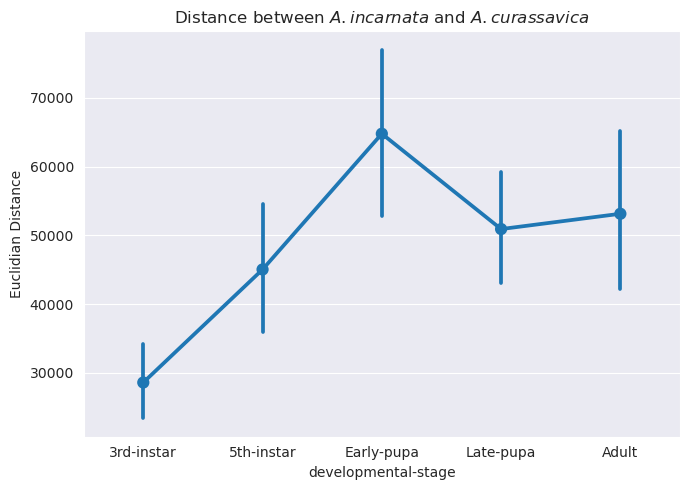

In [262]:
#and now to plot
sns.set_style('darkgrid')

fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
#euclidian distance
sns.pointplot(data=euclidian_distance_matrix_parsed, x='developmental-stage', y='distance', ax=ax1)
ax1.set_ylabel('Euclidian Distance')
ax1.set_title('Distance between $A. incarnata$ and $A. curassavica$')


plt.tight_layout()

In [267]:
#those results are basically the same as RMSE (which is good). Now I'll just spot check a PCA to see if the
#clustering makese sense. Of course, I'll do this in R and load the data
!./scripts/pca_plant.R

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     3.615e+05 2.483e+05 1.017e+05 7.296e+04 5.461e+04
Proportion of Variance 6.116e-01 2.887e-01 4.844e-02 2.492e-02 1.396e-02
Cumulative Proportion  6.116e-01 9.002e-01 9.487e-01 9.736e-01 9.876e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     2.466e+04 2.187e+04 1.648e+04 1.548e+04 1.268e+04
Proportion of Variance 2.850e-03 2.240e-03 1.270e-03 1.120e-03 7.500e-04
Cumulative Proportion  9.904e-01 9.926e-01 9.939e-01 9.950e-01 9.958e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     1.129e+04 1.037e+04 8.968e+03 7989.5763 7.674e+03
Proportion of Variance 6.000e-04 5.000e-04 3.800e-04    0.0003 2.800e-04
Cumulative Proportion  9.964e-01 9.969e-01 9.972e-01    0.9976 9.978e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     7.

In [285]:
#and now to load and plot the data
pca_data = pd.read_csv('data/uninfected_pca.csv', index_col=0)[["PC1", "PC2"]]
#add metadata data
stage = []
plant = []

for sample in list(pca_data.index):
    if sample[5] == '3':
        stage.append('third-instar')
    elif sample[5] == '5':
        stage.append('fifth-instar')
    elif sample[5] == 'E':
        stage.append('early-pupa')
    elif sample[5] == 'L':
        stage.append('late-pupa')
    elif sample[5] == 'A':
        stage.append('adult')

    if sample[6] == 'i':
        plant.append('A. incarnata')
    elif sample[6] == 'c':
        plant.append('A. curassavica')
        
pca_data['developmental-stage'] = stage
pca_data['plant'] = plant

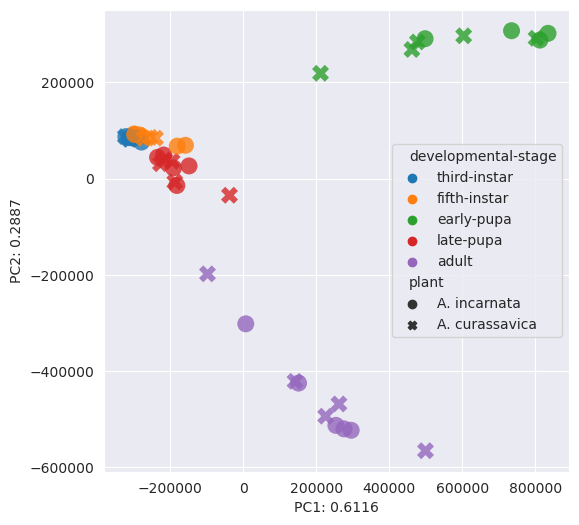

In [315]:
#and now to plot
sns.set_style('darkgrid')

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
hue_order = ['third-instar', 'fifth-instar', 'early-pupa', 'late-pupa', 'adult']
sns.scatterplot(data=pca_data, x='PC1', y='PC2', ax=ax1, hue='developmental-stage', 
                style='plant', hue_order = hue_order,
                s=150, alpha=0.8, edgecolor = 'none')

ax1.set_xlabel('PC1: 0.6116')
ax1.set_ylabel('PC2: 0.2887')

I'm really not sure what to make of this. There does seem to be relevant biological clustering by developmental stage. However, the path is really weird. It seems like there are not substantial changes between the third instars and the fifth instars. Then the early pupa really jut off from the fifth instars. However, then the late pupae are more similar to the larvae! Then that momentum is followed towards adults, which are very distinct from the late pupa. This is really peculiar. I suppose one source of this is that whatever chagnes occur at the ealy pupe are so drastic that it makes them super dissimilar to the other stages. This makes sense with the previous RMSE across developmental transitions analysis. There, the differences during the transition from fifth instar to early pupa were about as extreme as the transition from early pupa to late pupa. Maybe I'll visualize this one more way just to make sure I'm not crazy. Using heirarchical clustering and a heat map should do nicely.

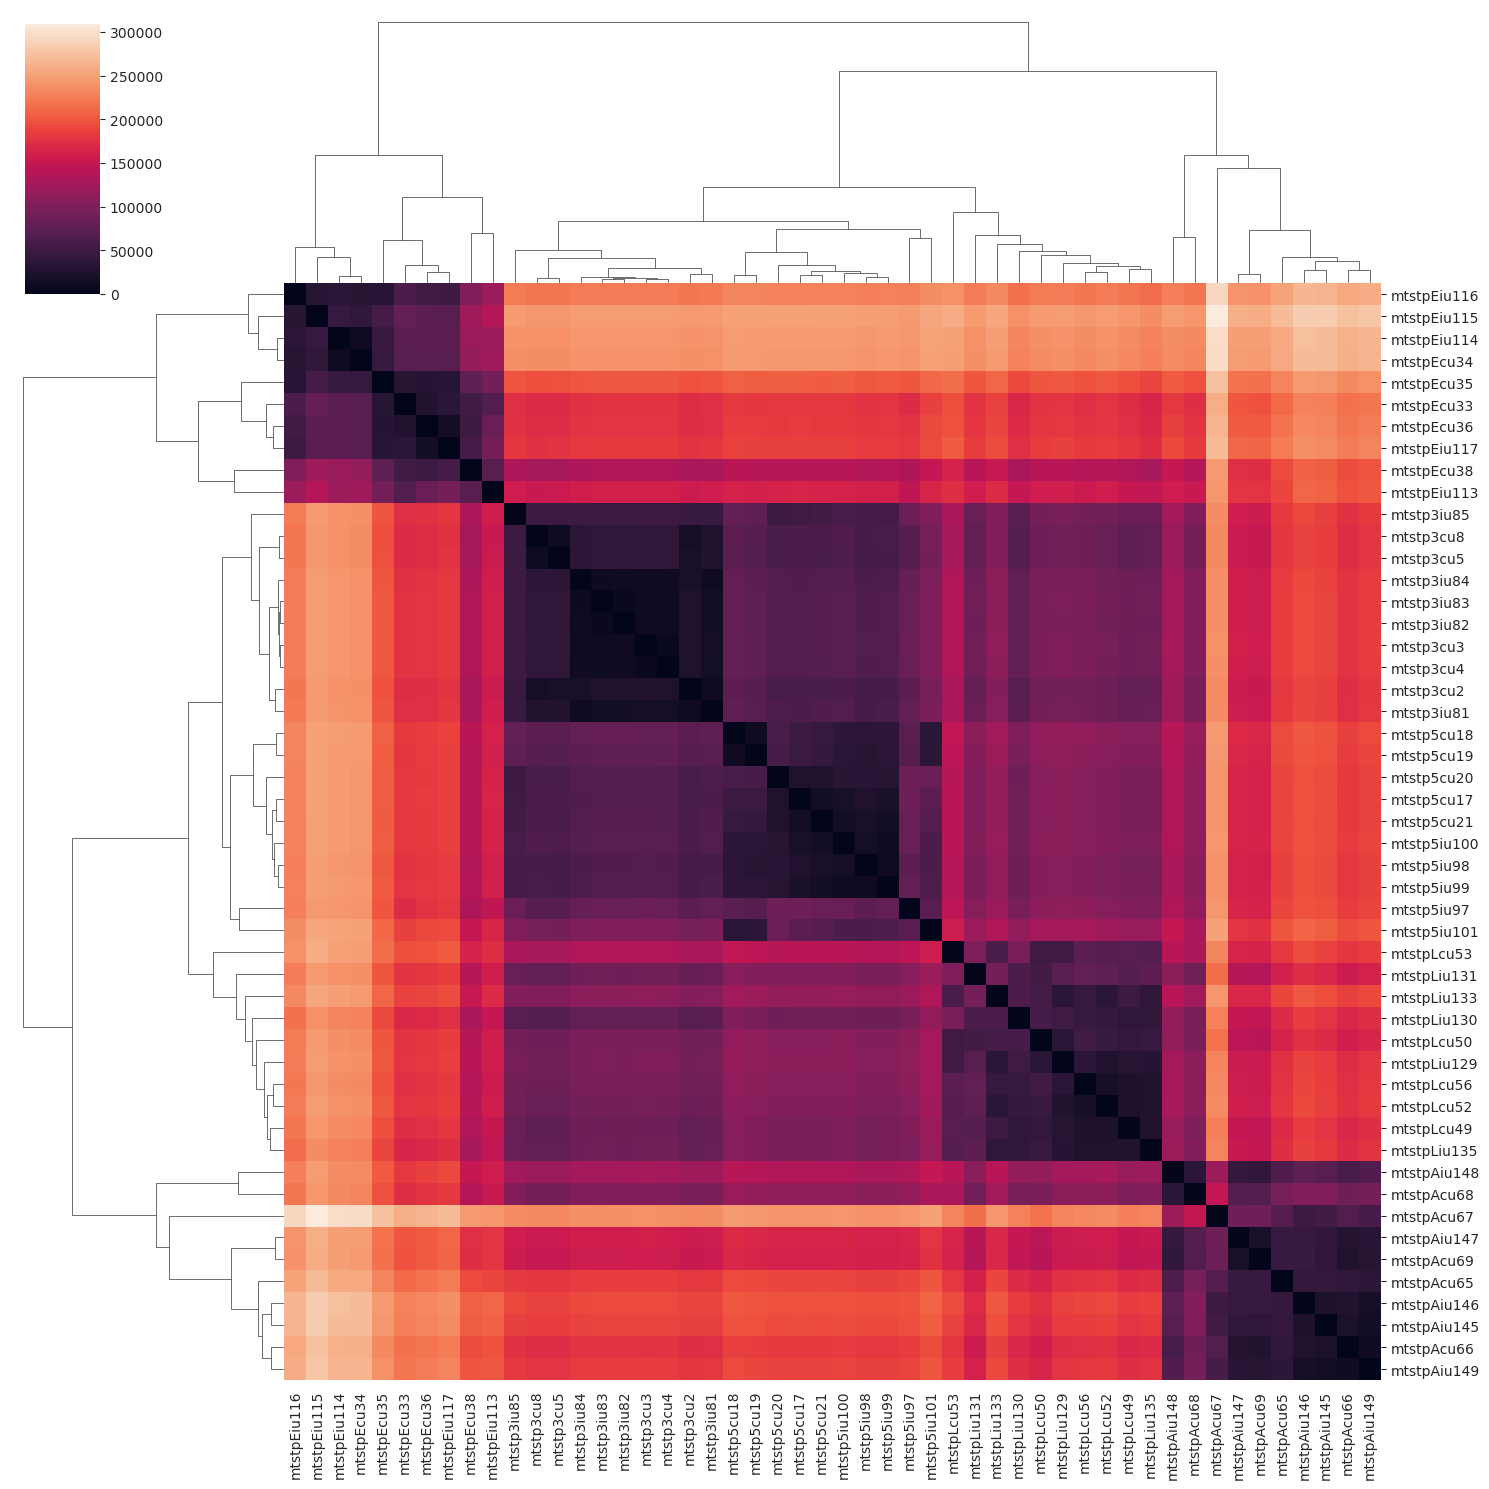

In [344]:
sns.clustermap(euclidian_distance_matrix, figsize=(15, 15))

Wow same pattern. This is super interesting, but I don't really know what to make of it now. I'll dig deeper in a bit. For now I'll try to partition variance to genetic background and plant, though it doesn't really look like they will explain that much.

In [319]:
#as usual, I perfer to do my stats in R
!./scripts/rda_plant_lineage.R

In [321]:
#load variance partitioning data
variance_partitioning_data = pd.read_csv('data/variance_paritioned.csv')
variance_partitioning_data

,developmental.stage,explained.by.genetic.background,explained.by.plant,p.genetic.background,p.plant
0,third-instar,-0.014366,0.037937,0.407,0.339
1,fifth-instar,-0.077027,-0.015150,0.409,0.360
2,early-pupa,0.334618,0.266165,0.090,0.086
3,late-pupa,0.113882,0.009543,0.332,0.701
4,adult,0.307762,-0.082289,0.079,0.604


(0.0, 0.4)

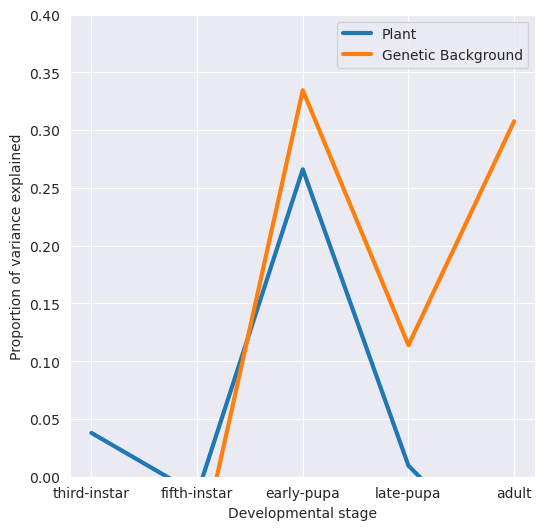

In [336]:
#and now to plot
sns.set_style('darkgrid')

fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
sns.lineplot(data=variance_partitioning_data, x='developmental.stage', y='explained.by.plant', 
             ax=ax1, color="tab:blue", linewidth=3)
sns.lineplot(data=variance_partitioning_data, x='developmental.stage', y='explained.by.genetic.background', 
             ax=ax1, color="tab:orange", linewidth=3)

custom_lines = [Line2D([0], [0], color="tab:blue", lw=3),
                Line2D([0], [0], color="tab:orange", lw=3)]


ax1.legend(custom_lines, ['Plant', 'Genetic Background'])
ax1.set_ylabel('Proportion of variance explained')
ax1.set_xlabel('Developmental stage')
ax1.set_ylim([0, 0.4])